Music Genre Classification Project (This is working with audio files)
Common Steps for Machine Learning Problems:

	1.	Define the Problem: Identify the problem you’re solving (classification, regression, etc.).
	2.	Collect the Data: Gather data relevant to the problem (e.g., images, text, audio, tabular data).
	3.	Preprocess the Data: Clean, format, and organize the data into features that can be fed into the model.
	4.	Feature Extraction: Extract or engineer features that represent the data. This step varies based on the type of data:
	•	For Audio: Use libraries like librosa to extract features like MFCCs, tempo, etc.
	•	For Images: Use image processing techniques to extract features (e.g., pixel values, edges).
	•	For Text: Use techniques like TF-IDF, word embeddings, or NLP-based feature extraction.
	•	For Tabular Data: Often involves scaling or encoding numeric and categorical features.
	5.	Split Data: Divide your data into training and testing sets (and sometimes a validation set).
	6.	Train the Model: Choose a machine learning algorithm (e.g., Logistic Regression, Random Forest, Neural Networks) and train the model using the training data.
	7.	Evaluate the Model: Measure performance on the test data using metrics like accuracy, precision, recall, etc.
	8.	Tune and Improve: Optimize the model by tweaking hyperparameters, trying different algorithms, or improving data quality.
	9.	Deploy the Model: Once satisfied, deploy the model in a production environment or use it to make predictions.


Change Kernel to use venv
Section 1: Import libraries

In [1]:
import librosa
import pandas as pd
import numpy as np
import soundfile as sf
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

	2.	Section 2: Load and process a sample audio file (for testing)

In [ ]:
# Load a sample audio file to test feature extraction
y, sr = librosa.load('../Data/genres_original/classical/classical.00002.wav', sr=None)
    
# Extract MFCCs as an example
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(y)

	3.	Section 3: Feature extraction for all audio files

In [3]:
# Function to extract features (MFCC, chroma, tempo) from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y , sr=sr).mean()
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y , sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()
    rms = librosa.feature.rms(y=y).mean()
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean()
    
    return np.hstack((mfccs, chroma, tempo, spectral_bandwidth,spectral_centroid,spectral_contrast,spectral_rolloff,rms,zero_crossing_rate))

# Loop through the dataset to extract features
features_list = []
genres = ['blues', 'classical', 'jazz', 'rock','pop']

for genre in genres:
    folder_path = f'../data/genres_original/{genre}'
    for file in os.listdir(folder_path):
        if file.endswith('.wav'):
            file_path = os.path.join(folder_path, file)
            try:
                features = extract_features(file_path)
                features_list.append(np.append(features, genre))
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue

# Create DataFrame with the extracted features
# Existing feature names
mfcc_names = [f'mfcc{i}' for i in range(13)]
chroma_names = [f'chroma{i}' for i in range(12)]

# New feature names
new_feature_names = ['tempo','spectral_centroid','spectral_bandwidth','spectral_rolloff','zero_crossing_rate','rms','spectral_contrast']

# Combine all feature names
columns = mfcc_names + chroma_names + new_feature_names + ['genre']
df = pd.DataFrame(features_list, columns=columns)

	4.	Section 4: Build and train a model

In [5]:
# Split the dataset into features and labels
X = df.drop('genre', axis=1)
y = df['genre']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.76


5.	Section 5: Visualize the confusion matrix

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Deep Dive into Model Performance

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [7]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Existing features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = mfccs.mean(axis=1)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    # New features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()
    rms = librosa.feature.rms(y=y).mean()
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean()
    
    # Combine all features into a single array
    features = np.hstack([
        mfccs_mean,
        chroma_mean,
        tempo,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,
        spectral_contrast
    ])
    
    return features


In [9]:
# Existing feature names
mfcc_names = [f'mfcc{i}' for i in range(13)]
chroma_names = [f'chroma{i}' for i in range(12)]

# New feature names
new_feature_names = [
    'tempo',
    'spectral_centroid',
    'spectral_bandwidth',
    'spectral_rolloff',
    'zero_crossing_rate',
    'rms',
    'spectral_contrast'
]

# Combine all feature names
columns = mfcc_names + chroma_names + new_feature_names + ['genre']


In [11]:
features_list = []
genres = ['blues', 'classical', 'jazz', 'rock']

for genre in genres:
    folder_path = f'data/{genre}'
    for file in os.listdir(folder_path):
        if file.endswith('.wav'):
            file_path = os.path.join(folder_path, file)
            features = extract_features(file_path)
            features_list.append(np.append(features, genre))

# Create DataFrame with the new features
df = pd.DataFrame(features_list, columns=columns)


FileNotFoundError: [Errno 2] No such file or directory: 'data/blues'

In [13]:
X = df.drop('genre', axis=1)
y = df['genre']

# Convert feature columns to numeric
X = X.apply(pd.to_numeric)

# Encode labels if necessary
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Next Steps to Improve Your Model
Let's proceed step by step to diagnose and improve your model's performance.

1. Analyze Feature Importance
Understanding which features contribute most to your model can help you decide which ones to keep.

In [17]:
# Calculate feature importances
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort features by importance
feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importance_df)

               feature  importance
30                 rms    0.098002
0                mfcc0    0.060108
26   spectral_centroid    0.055623
5                mfcc5    0.049152
29  zero_crossing_rate    0.048470
3                mfcc3    0.045107
8                mfcc8    0.043252
28    spectral_rolloff    0.041489
27  spectral_bandwidth    0.038139
6                mfcc6    0.034684
1                mfcc1    0.033949
14             chroma1    0.029508
7                mfcc7    0.028094
31   spectral_contrast    0.027673
2                mfcc2    0.027150
19             chroma6    0.026090
12              mfcc12    0.024975
23            chroma10    0.023524
4                mfcc4    0.023276
24            chroma11    0.023166
17             chroma4    0.022722
22             chroma9    0.022116
21             chroma8    0.020919
10              mfcc10    0.020216
11              mfcc11    0.019491
9                mfcc9    0.019150
20             chroma7    0.017164
13             chrom

In [21]:
# Assuming 'clf' is your trained Random Forest model
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


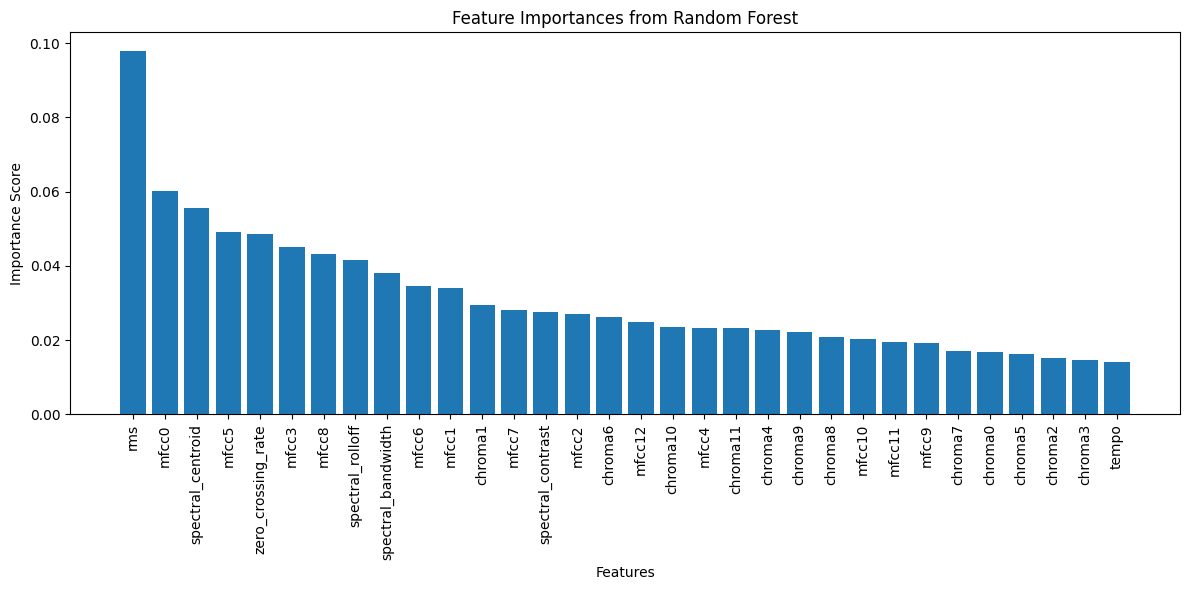

In [23]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


1.3 Identify Low-Importance Features
Let's focus on features with very low importance scores.

In [25]:
# Set a threshold for importance
threshold = 0.02  # You can adjust this value

# Identify features to keep
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Identify features to drop
unimportant_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature']

print("Features to keep:")
print(important_features.tolist())

print("\nFeatures to drop:")
print(unimportant_features.tolist())


Features to keep:
['rms', 'mfcc0', 'spectral_centroid', 'mfcc5', 'zero_crossing_rate', 'mfcc3', 'mfcc8', 'spectral_rolloff', 'spectral_bandwidth', 'mfcc6', 'mfcc1', 'chroma1', 'mfcc7', 'spectral_contrast', 'mfcc2', 'chroma6', 'mfcc12', 'chroma10', 'mfcc4', 'chroma11', 'chroma4', 'chroma9', 'chroma8', 'mfcc10']

Features to drop:
['mfcc11', 'mfcc9', 'chroma7', 'chroma0', 'chroma5', 'chroma2', 'chroma3', 'tempo']


In [27]:
# Keep only important features
X_reduced = X[important_features]


In [29]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y_encoded, test_size=0.2, random_state=42
)

In [ ]:
clf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
clf_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = clf_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f'Accuracy after feature selection: {accuracy_reduced * 100:.2f}%')




In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_reduced)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Feature Selection')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)

# Fit the grid search to the data
grid_search.fit(X_train_reduced, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


In [ ]:
# Predict using the best model
y_pred_tuned = best_model.predict(X_test_reduced)

# Calculate accuracy
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy after hyperparameter tuning: {tuned_accuracy * 100:.2f}%")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Tuning')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_tuned, target_names=le.classes_)
print(report)


In [ ]:
pip install xgboost


In [31]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model on the training data
xgb_clf.fit(X_train_reduced, y_train)


/Users/hesambeigy/Projects/MusicGenreClassification/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:03:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
# Predict on the test data
y_pred_xgb = xgb_clf.predict(X_test_reduced)


In [37]:
# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Print classification report
report = classification_report(y_test, y_pred_xgb, target_names=le.classes_)
print(report)


XGBoost Accuracy: 83.00%
              precision    recall  f1-score   support

       blues       0.88      0.85      0.87        27
   classical       0.93      0.88      0.90        16
        jazz       0.71      0.75      0.73        16
         pop       0.85      0.96      0.90        24
        rock       0.73      0.65      0.69        17

    accuracy                           0.83       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



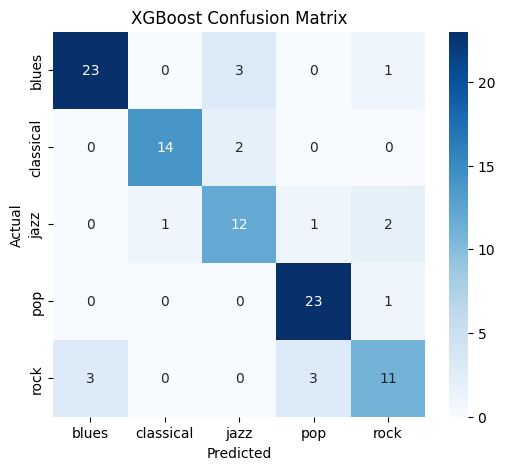

In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


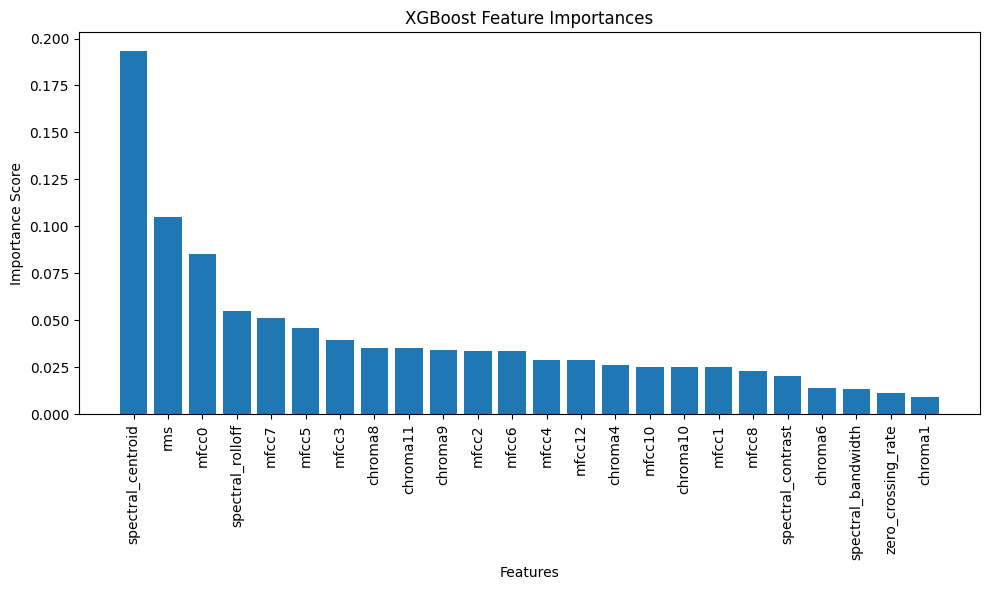

In [41]:
# Get feature importances from the model
importances = xgb_clf.feature_importances_
feature_names = X_train_reduced.columns

# Create a DataFrame to display importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('XGBoost Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit Grid Search
grid_search.fit(X_train_reduced, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best model
best_xgb = grid_search.best_estimator_

# Evaluate best model
y_pred_best_xgb = best_xgb.predict(X_test_reduced)
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"Best XGBoost Model Accuracy: {best_xgb_accuracy * 100:.2f}%")


/Users/hesambeigy/Projects/MusicGenreClassification/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:04:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/hesambeigy/Projects/MusicGenreClassification/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:04:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/hesambeigy/Projects/MusicGenreClassification/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:04:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/hesambeigy/Projects/MusicGenreClassification/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:04:22] WARNING: /Users/runner/

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
Best XGBoost Model Accuracy: 80.00%


In [45]:
from sklearn.metrics import classification_report

# For the XGBoost model
report = classification_report(y_test, y_pred_xgb, target_names=le.classes_)
print(report)


              precision    recall  f1-score   support

       blues       0.88      0.85      0.87        27
   classical       0.93      0.88      0.90        16
        jazz       0.71      0.75      0.73        16
         pop       0.85      0.96      0.90        24
        rock       0.73      0.65      0.69        17

    accuracy                           0.83       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



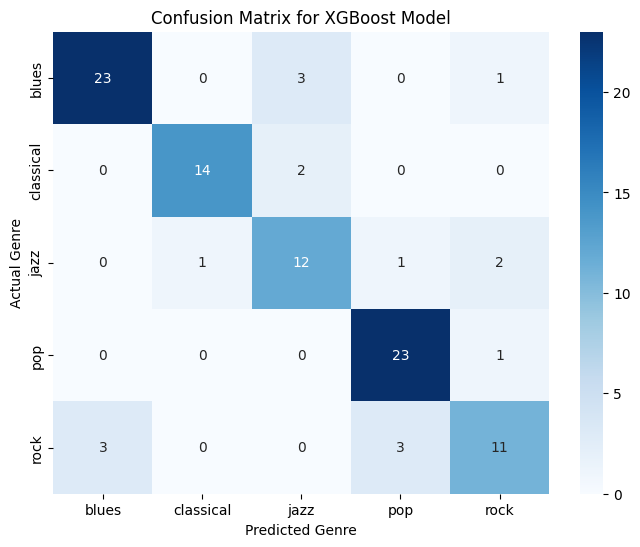

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


In [49]:
# Create a DataFrame with actual and predicted labels
results_df = X_test_reduced.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred_xgb

# Decode labels to genre names
results_df['Actual_Genre'] = le.inverse_transform(results_df['Actual'])
results_df['Predicted_Genre'] = le.inverse_transform(results_df['Predicted'])

# Filter misclassified samples
misclassified = results_df[results_df['Actual'] != results_df['Predicted']]

print(misclassified[['Actual_Genre', 'Predicted_Genre']])


    Actual_Genre Predicted_Genre
231         jazz             pop
55         blues            jazz
104    classical            jazz
93         blues            jazz
209         jazz       classical
333         rock           blues
355         rock           blues
117    classical            jazz
70         blues            jazz
490          pop            rock
82         blues            rock
320         rock           blues
302         rock             pop
268         jazz            rock
346         rock             pop
247         jazz            rock
384         rock             pop


/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


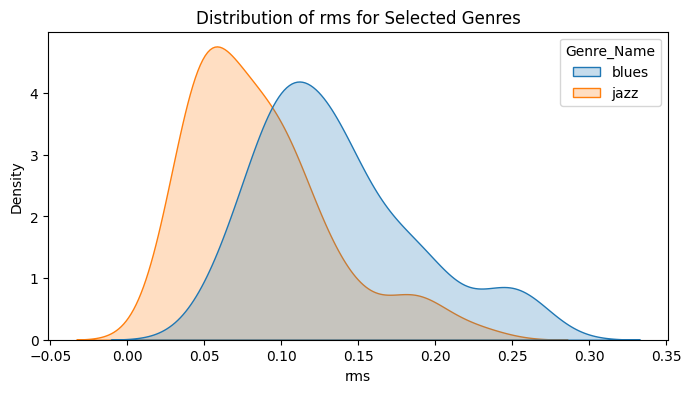

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


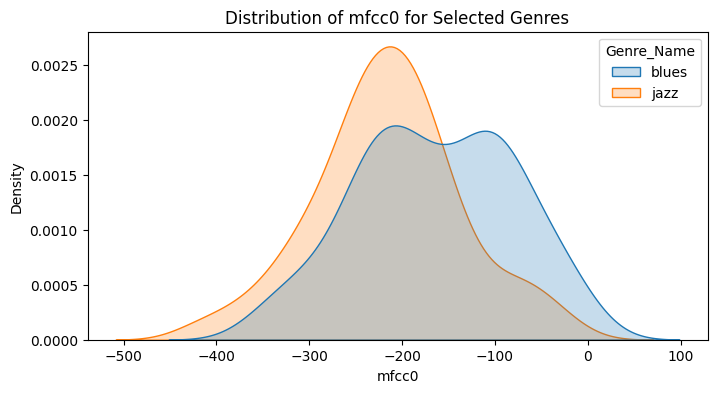

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


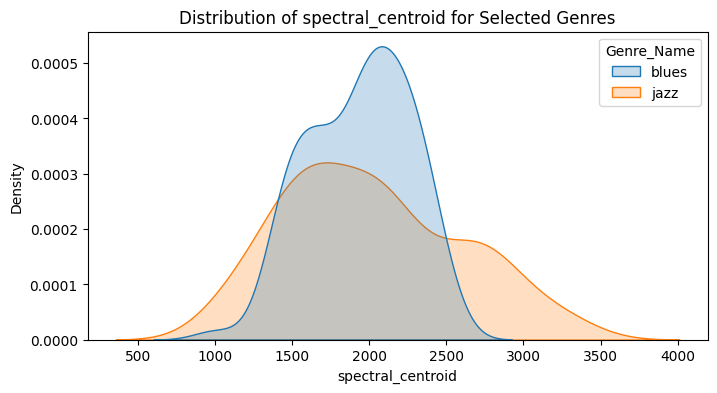

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


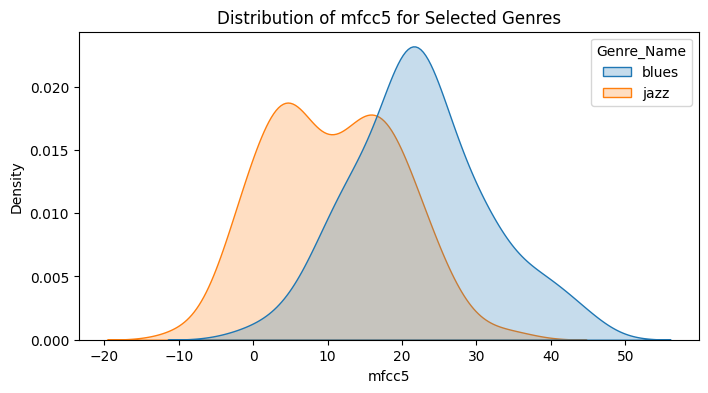

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


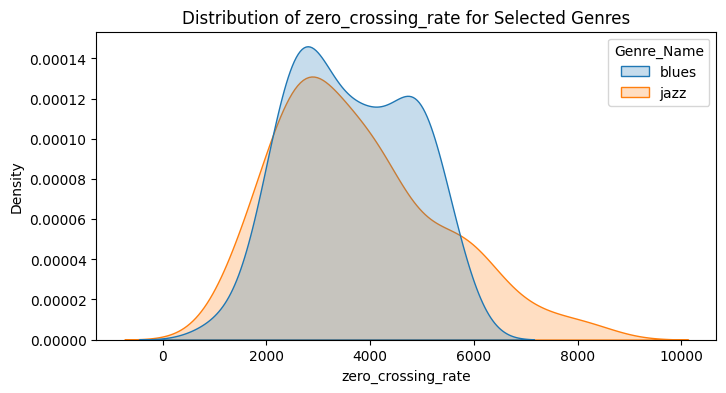

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


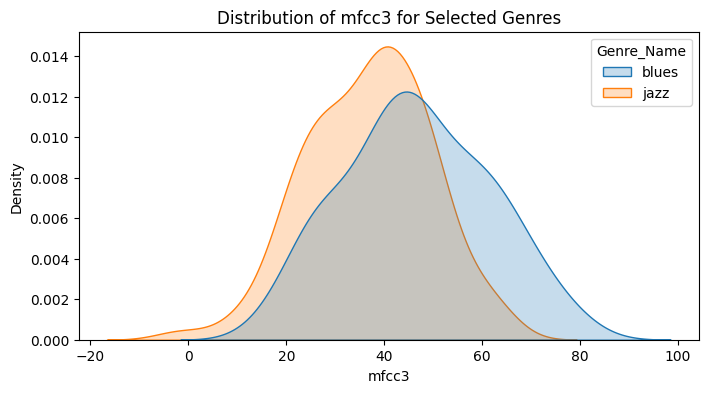

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


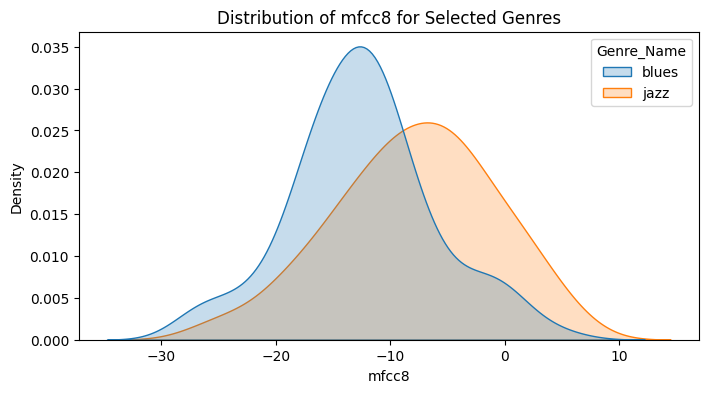

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


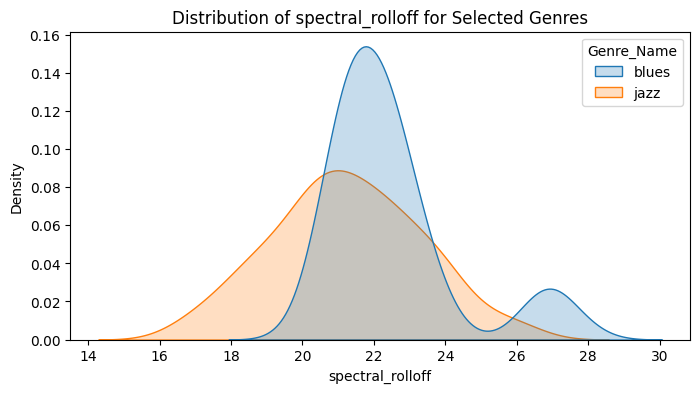

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


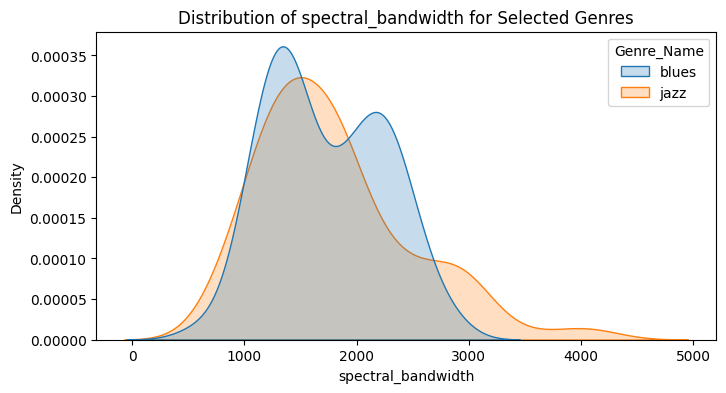

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


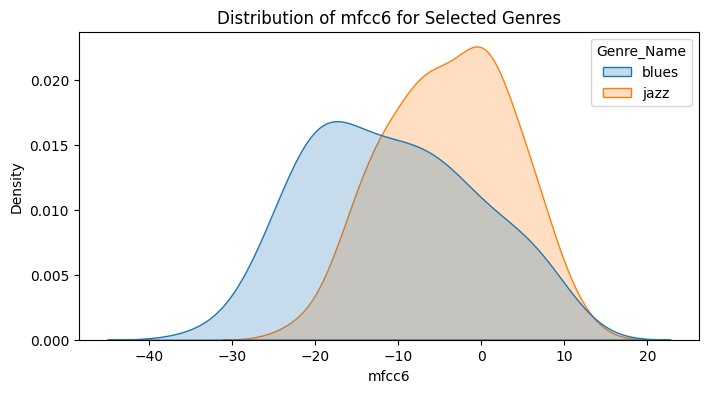

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


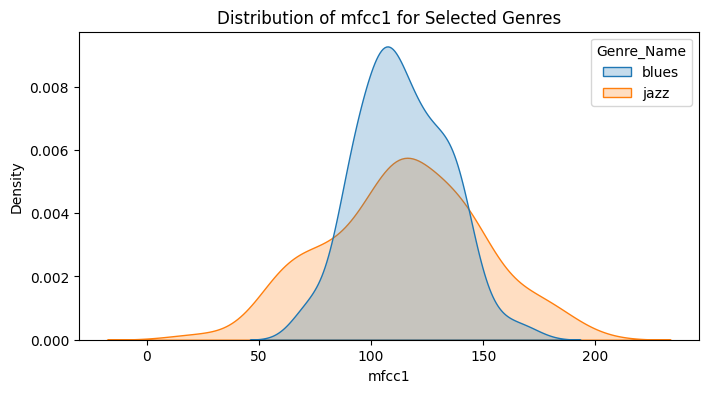

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


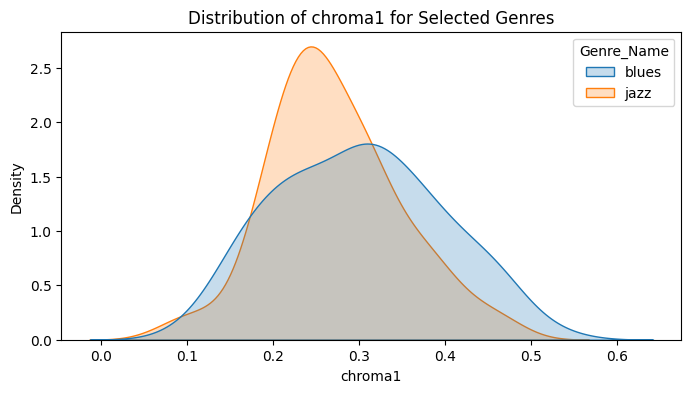

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


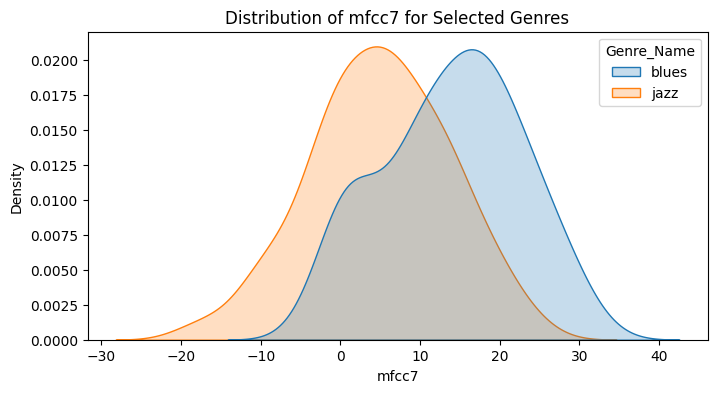

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


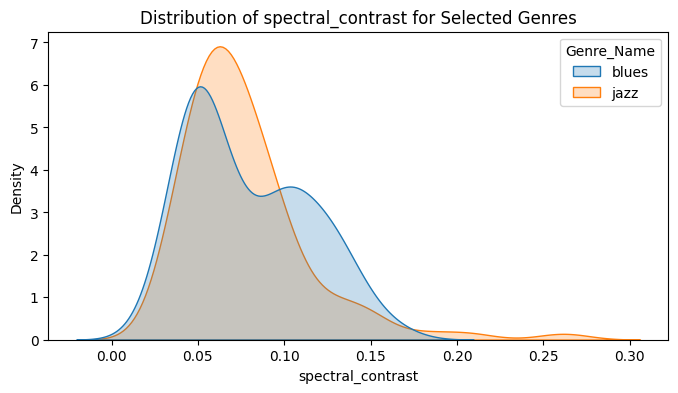

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


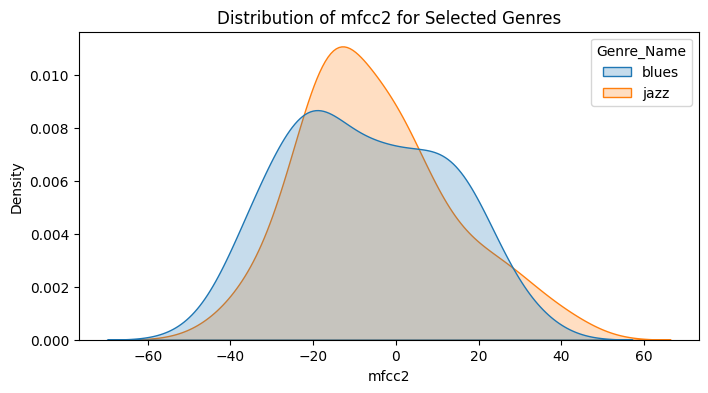

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


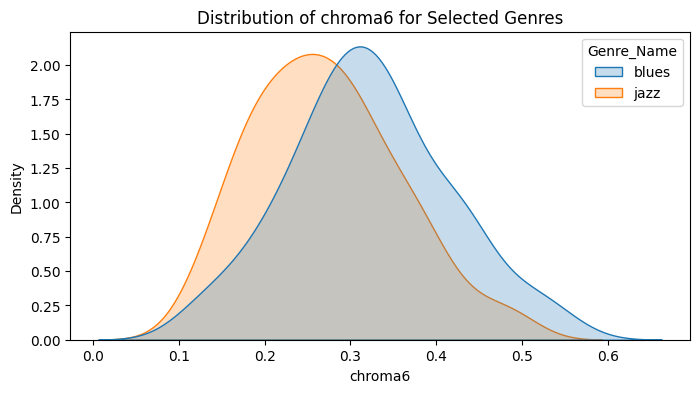

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


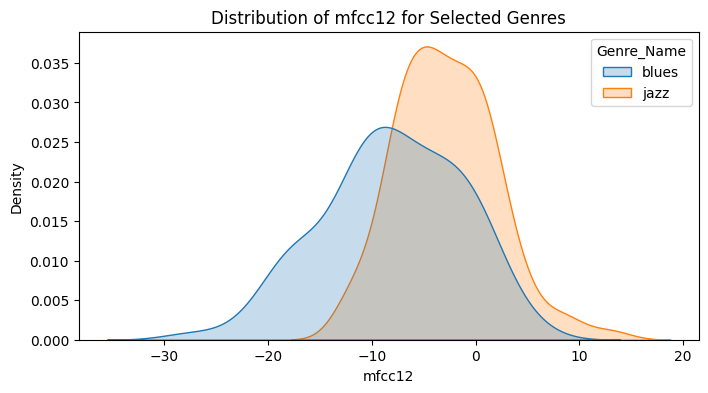

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


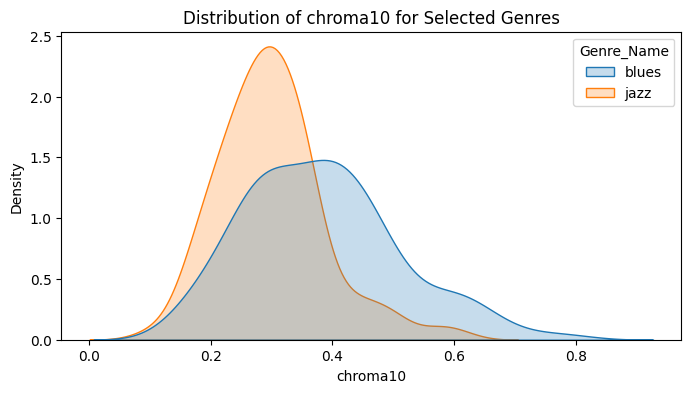

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


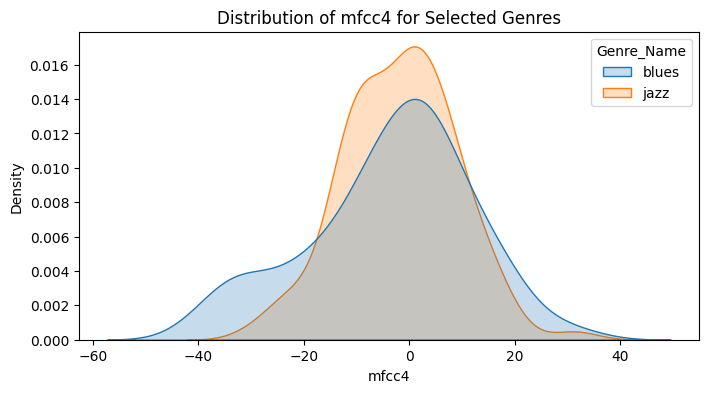

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


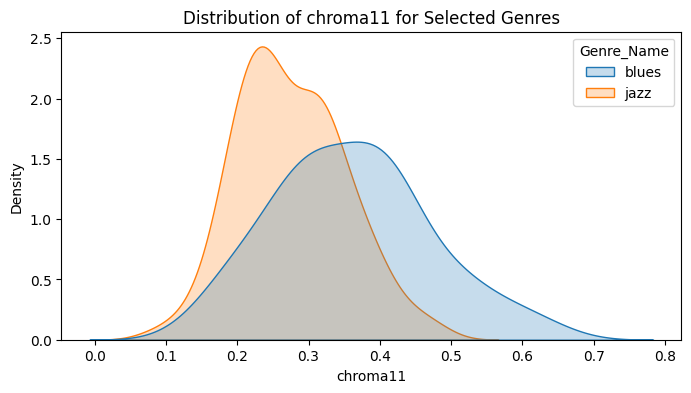

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


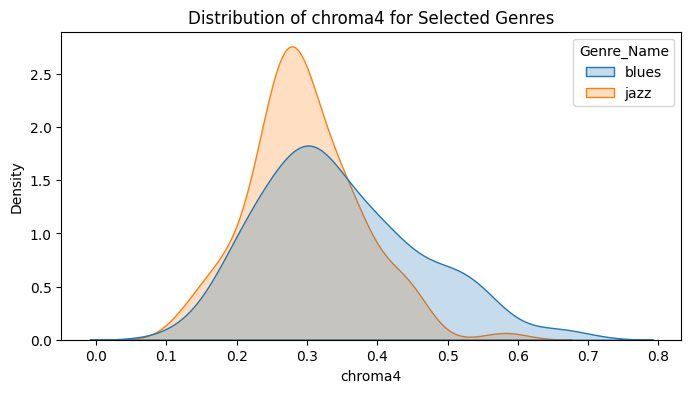

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


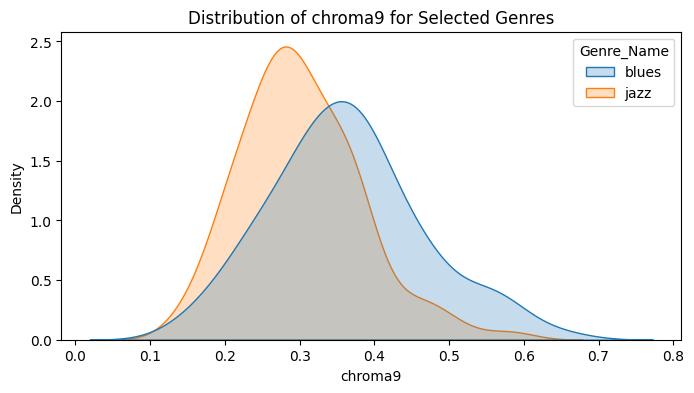

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


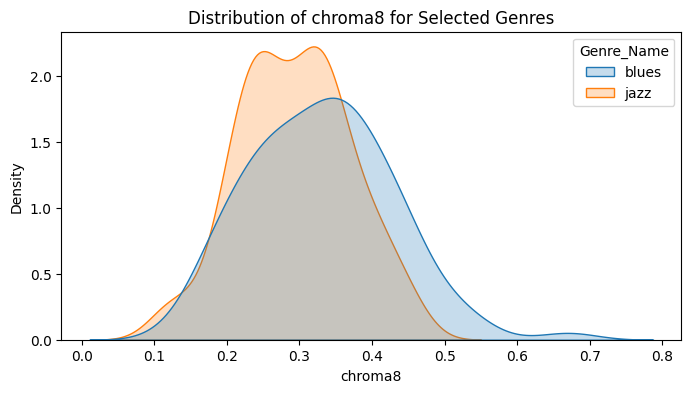

/var/folders/d9/c80g3bb531q80053pfjgrzy80000gn/T/ipykernel_1821/1792669256.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)


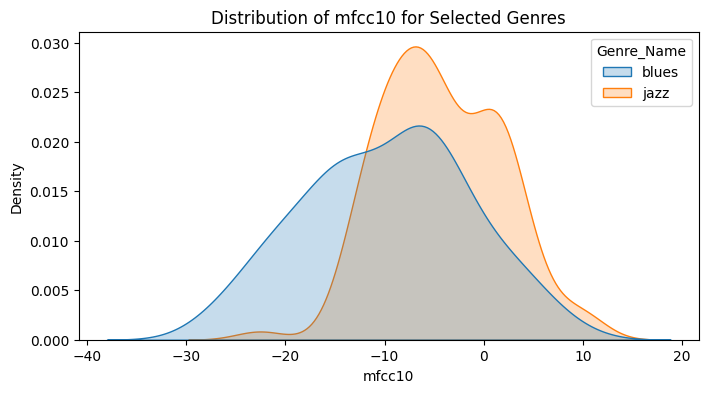

In [51]:
# Combine features and labels
data_analysis = X_reduced.copy()
data_analysis['Genre'] = y_encoded

# Map encoded labels back to genre names
data_analysis['Genre_Name'] = le.inverse_transform(data_analysis['Genre'])

# Select genres to compare (e.g., 'blues' vs 'jazz')
genres_to_compare = ['blues', 'jazz']
data_subset = data_analysis[data_analysis['Genre_Name'].isin(genres_to_compare)]

# Plot feature distributions
import seaborn as sns

for feature in important_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data_subset, x=feature, hue='Genre_Name', shade=True)
    plt.title(f'Distribution of {feature} for Selected Genres')
    plt.show()


In [53]:
# Extract tonal centroid features (tonnetz)
tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).mean(axis=1)

# Extract spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean(axis=1)

# Add these features to your feature array
features = np.hstack([mfccs_mean, chroma_mean, spectral_contrast, tonnetz, tempo])


ParameterError: Audio data must be of type numpy.ndarray